In [1225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reads in all sheets in Riket / 0

## A)

In [1226]:
df_english= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Engelska", skiprows= 8)
df_math= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Matematik", skiprows= 8)
df_swedish= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska", skiprows= 8)
df_swedish2= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska som andraspråk", skiprows= 8)
df_rapport= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Rapportbeskrivning och def.")
df_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [1227]:
dfs= {
    "English": df_english,
    "Math": df_math,
    "Swedish": df_swedish,
    "Swedish2": df_swedish2,
    "Report": df_rapport
}
labels= [
    "",
    "",
    "(A-F)",
    "(A-F)",
    "(A-F)",
    "%(A-E)",
    "%(A-E)",
    "%(A-E)",
    "(Poäng)",
    "(Poäng)",
    "(Poäng)"
]
columns_copy= []

for subject in dfs:
    
    for column in dfs[subject].columns:
        dfs[subject][column] = dfs[subject][column].replace("..", 0)
        
    dfs[subject].columns= dfs[subject].columns.str.replace(" "[0:], "")
    dfs[subject]= dfs[subject].rename(columns= {"Typavhuvudman": "Huvudman"})
    columns_copy= dfs[subject].columns.tolist()
    columns_copy= [f"{col}{label}" for col, label in zip(dfs[subject].columns, labels)]
    
    dfs[subject].columns= columns_copy
    
df_english= dfs["English"]
df_math= dfs["Math"]
df_swedish= dfs["Swedish"]
df_swedish2= dfs["Swedish2"]
df_rapport= dfs["Report"]
df_swedish2

C:\Users\milto\AppData\Local\Temp\ipykernel_13980\3370189821.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[subject][column] = dfs[subject][column].replace("..", 0)


,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12.0,10.4
3,Riket,Skolverket,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Collections

In [1228]:
dfs= [
    df_english,
    df_math,
    df_swedish,
    df_swedish2
]
colors = {
    "RED1": "#D60C00",
    "YELLOW1": "#F4D000",
    "BLUE1": "#1400F4",
    "BLUE2": "#00204E",
    "GREEN1": "#4DF400",
    "GRAY1": "#292929"
}
bar_colors = [
    colors["BLUE1"],
    colors["RED1"],
    colors["YELLOW1"],
    colors["GREEN1"]
]
subjects = [
    "English",
    "Math",
    "Swedish",
    "Swedish2"
]
total_points= [df.loc[0, "Totalt(Poäng)"]for df in dfs]

## B)

In [1229]:
df_math

,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [1230]:
girls_f= round(df_math.loc[0, "Flickor(A-F)"]- df_math.loc[0, "Flickor(A-F)"]* (df_math.loc[0, "Flickor%(A-E)"]/ 100), 2)
boys_f= round(df_math.loc[0, "Pojkar(A-F)"]- df_math.loc[0, "Pojkar(A-F)"]* (df_math.loc[0, "Pojkar%(A-E)"]/ 100), 2)
grades_f= round(girls_f+ boys_f, 2)
grades_f

11622.81

## C)

Text(0.5, 1.0, 'Total subject score in Sweden')

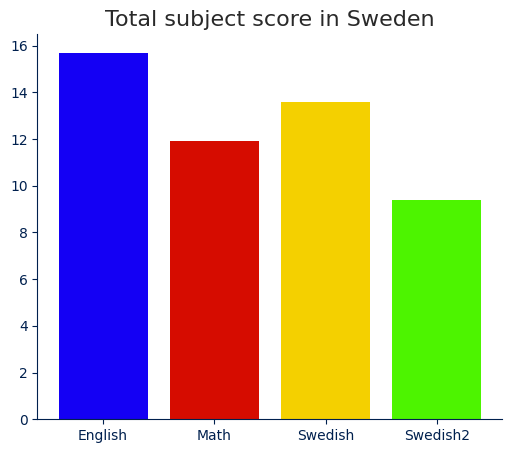

In [1231]:
fig, ax= plt.subplots(figsize= (6, 5))
ax.bar(subjects, total_points, color= bar_colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])
ax.tick_params(colors= colors["BLUE2"])
ax.set_title("Total subject score in Sweden", color= colors["GRAY1"], fontsize= 16)

## D)

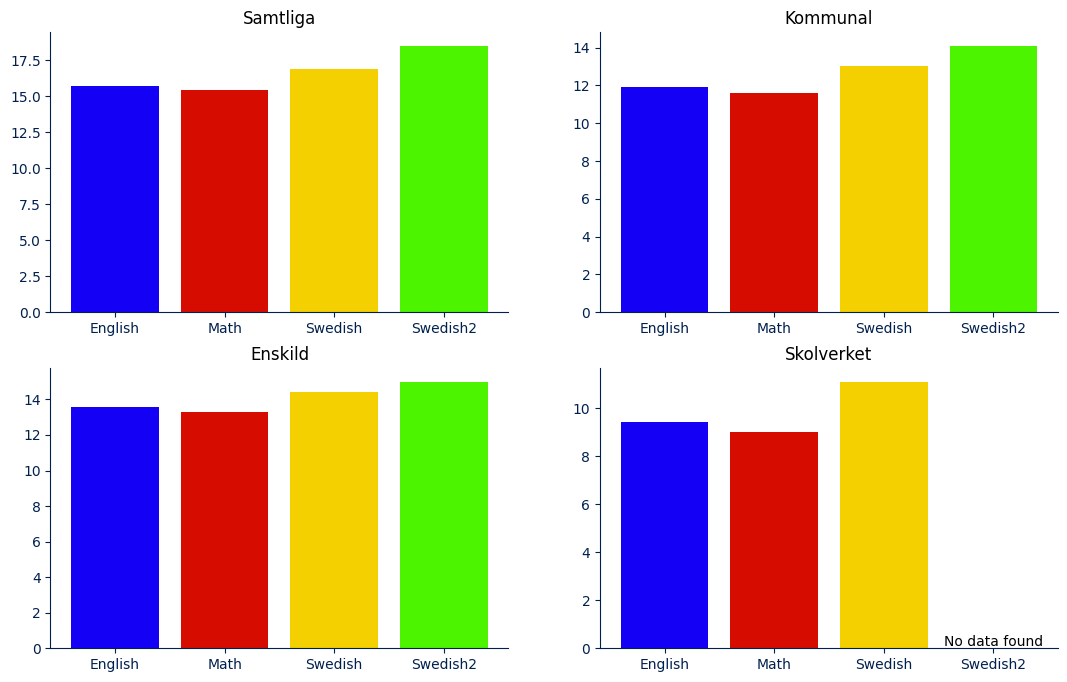

In [1232]:
huvudmann= ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
fig, axs= plt.subplots(int(len(huvudmann)/2), int(len(huvudmann)/2), figsize= (13, 8))


for ax, df, huvudman in zip(axs.flatten(), dfs, huvudmann):

    ax.bar(subjects, df["Totalt(Poäng)"], color= bar_colors)
    
    for x, point in enumerate(df["Totalt(Poäng)"]):
        if point <= 0:
            ax.text(x-0.45, 0.1, "No data found")
    ax.set(title= huvudman)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(colors["BLUE2"])
    ax.spines["left"].set_color(colors["BLUE2"])
    ax.tick_params(colors= colors["BLUE2"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    

# Betyg och prov / 1

## A)

In [1233]:
df_1a_raw= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1A", skiprows= 9)
df_1b_raw= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1B", skiprows= 7)

In [1234]:
df_1b_raw.head()

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [1235]:
df_1a_raw.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955


In [1236]:
categories= [
    "Antal",
    "(A-F)",
    "(A-E)",
    "Meritvärde 16 ämnen",
    "Meritvärde 17 ämnen",
    "% elever med som saknar godkänt i ett eller flera ämnen"
]
columns_multi1a= pd.MultiIndex.from_tuples([
    ("", ""),
    (categories[0], "Totalt"),
    (categories[0], "Flickor"),
    (categories[0], "Pojkar"),
    (categories[1], "Totalt"),
    (categories[1], "Flickor"),
    (categories[1], "Pojkar"),
    (categories[2], "Totalt"),
    (categories[2], "Flickor"),
    (categories[2], "Pojkar")
], names= ["Kategori", "Indelning"])
df_1a_raw.columns= columns_multi1a

columns_milti1b= pd.MultiIndex.from_tuples([
    ("", ""),
    (categories[3], "Totalt"),
    (categories[3], "Flickor"),
    (categories[3], "Pojkar"),
    (categories[4], "Totalt"),
    (categories[4], "Flickor"),
    (categories[4], "Pojkar"),
    (categories[5], "Totalt"),
    (categories[5], "Flickor"),
    (categories[5], "Pojkar"),
], names= ["Kategori", "Indelning"])
df_1b_raw.columns= columns_milti1b

df_1a= df_1a_raw
df_1b= df_1b_raw

df_1a= df_1a[df_1a[""] != "därav"].reset_index(drop= True)
df_1b= df_1b[df_1b[""] != "därav"].reset_index(drop= True)

In [1237]:
df_1a

Kategori                                                         Antal  \
Indelning                                                       Totalt   
0                                                    2018/19  112731.0   
1                                                    2019/20  115023.0   
2                                                    2020/21  116359.0   
3                                                    2021/22  120525.0   
4                                                    2022/23  121369.0   
5                                                     Kommun   96204.0   
6                                     Internationella skolor     213.0   
7                                                    Enskild   25165.0   
8                                          Allmän inriktning   23085.0   
9                                              Konfessionell    1036.0   
10                                                   Waldorf     630.0   
11                                    Internationella skolor     414.0   
12                                Elever med svensk bakgrund   88383.0   
13                              Elever med utländsk bakgrund   31918.0   
14                                           Födda i Sverige   13927.0   
15                           Födda utomlands, inv. före 2014    6431.0   
16                     Födda utomlands, inv. 2014 el. senare   11560.0   
17         Totalt exkl. nyinvandrade elever och okänd bak...  117503.0   
18                                       Nyinvandrade elever    2799.0   
19                                 Elever med okänd bakgrund    1067.0   
20                           Föräldrarnas högsta utbildning2       NaN   
21                                   Förgymnasial utbildning    6578.0   
22                                      Gymnasial utbildning   36842.0   
23                                 Eftergymnasial utbildning   74793.0   
24                                           Kort utbildning   18682.0   
25                                           Lång utbildning   56111.0   

Kategori                      (A-F)                  (A-E)                 
Indelning  Flickor   Pojkar  Totalt Flickor Pojkar  Totalt Flickor Pojkar  
0          54667.0  58064.0  112280   54430  57850  110663   53757  56906  
1          55670.0  59353.0  114444   55389  59055  112728   54711  58017  
2          56715.0  59644.0  115710   56394  59316  114136   55721  58415  
3          58513.0  62012.0  119891   58207  61684  117935   57312  60623  
4          59043.0  62326.0  120742   58703  62039  118736   57781  60955  
5          46478.0  49726.0   95991   46363  49628   94276   45588  48688  
6            115.0     98.0       .       .      .       .       .      .  
7          12565.0  12600.0   24751   12340  12411   24460   12193  12267  
8          11511.0  11574.0   23085   11511  11574   22815   11372  11443  
9            532.0    504.0    1036     532    504    1025     526    499  
10           297.0    333.0     630     297    333     620     295    325  
11           225.0    189.0       .       .      .       .       .      .  
12         43044.0  45339.0   88214   42961  45253   86799   42274  44525  
13         15488.0  16430.0   31488   15247  16241   30999   15066  15933  
14          6831.0   7096.0   13876    6807   7069   13709    6735   6974  
15          3078.0   3353.0    6340    3025   3315    6269    2993   3276  
16          5579.0   5981.0   11272    5415   5857   11021    5338   5683  
17         57195.0  60308.0  117044   56952  60092  115254   56114  59140  
18          1338.0   1461.0    2658    1256   1402    2544    1226   1318  
19           510.0    557.0    1040     495    545     938     441    497  
20             NaN      NaN     NaN     NaN    NaN     NaN     NaN    NaN  
21          3197.0   3381.0    6575    3197   3378    6327    3091   3236  
22         17909.0  18933.0   36810   17893  18917   35938   17488  18450  
23         36473.0  38320.0

In [1238]:
df_1b.head()

Kategori           Meritvärde 16 ämnen                Meritvärde 17 ämnen  \
Indelning                       Totalt Flickor Pojkar              Totalt   
0          2018/19               221.7   234.3  209.8               229.8   
1          2019/20               222.9   235.7  210.9               231.1   
2          2020/21               223.9   235.4  212.9               232.1   
3          2021/22               221.2   231.6  211.4               229.2   
4          2022/23               220.6   229.7  211.9               228.5   

Kategori                  \
Indelning Flickor Pojkar   
0           243.3  217.0   
1           244.9  218.2   
2           244.4  220.3   
3           240.3  218.8   
4           238.2  219.3   

Kategori  % elever med som saknar godkänt i ett eller flera ämnen          \
Indelning                                                  Totalt Flickor   
0                                                       24.5         21.7   
1                                                       23.9         21.4   
2                                                       23.9         21.9   
3                                                       25.9         24.2   
4                                                       26.8         25.5   

Kategori          
Indelning Pojkar  
0           27.2  
1           26.3  
2           25.9  
3           27.5  
4           28.0

In [1239]:
total_f= df_1a.loc[0:4, (categories[0], "Totalt")].values* (df_1b.loc[0:4, (categories[5], "Totalt")].values/ 100)
girls_f= df_1a.loc[0:4, (categories[0], "Flickor")].values* (df_1b.loc[0:4, (categories[5], "Flickor")].values/ 100)
boys_f= df_1a.loc[0:4, (categories[0], "Pojkar")].values* (df_1b.loc[0:4, (categories[5], "Pojkar")].values/ 100)
years= df_1b.loc[0:4, ""]

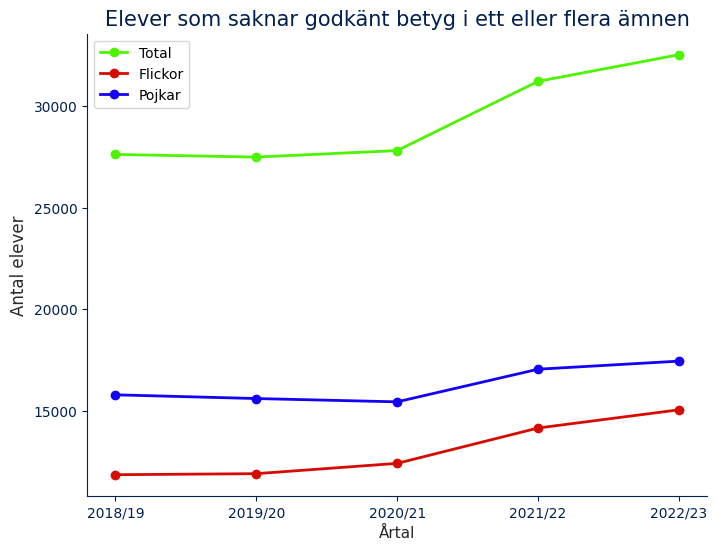

In [1240]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title(
    "Elever som saknar godkänt betyg i ett eller flera ämnen",
    color=colors["BLUE2"],
    fontsize=15,
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])

ax.tick_params(colors=colors["BLUE2"])

ax.set_xlabel("Årtal", color=colors["GRAY1"], fontsize=11)
ax.set_ylabel("Antal elever", color=colors["GRAY1"], fontsize=12)

ax.plot(years, total_f, label="Total", color=colors["GREEN1"], marker="o", linewidth=2)
ax.plot(years, girls_f, label="Flickor", color=colors["RED1"], marker="o", linewidth=2)
ax.plot(years, boys_f, label="Pojkar", color=colors["BLUE1"], marker="o", linewidth=2)

ax.legend(loc="upper left")
plt.show()

## B)

In [1241]:
df_1b.head()

Kategori           Meritvärde 16 ämnen                Meritvärde 17 ämnen  \
Indelning                       Totalt Flickor Pojkar              Totalt   
0          2018/19               221.7   234.3  209.8               229.8   
1          2019/20               222.9   235.7  210.9               231.1   
2          2020/21               223.9   235.4  212.9               232.1   
3          2021/22               221.2   231.6  211.4               229.2   
4          2022/23               220.6   229.7  211.9               228.5   

Kategori                  \
Indelning Flickor Pojkar   
0           243.3  217.0   
1           244.9  218.2   
2           244.4  220.3   
3           240.3  218.8   
4           238.2  219.3   

Kategori  % elever med som saknar godkänt i ett eller flera ämnen          \
Indelning                                                  Totalt Flickor   
0                                                       24.5         21.7   
1                                                       23.9         21.4   
2                                                       23.9         21.9   
3                                                       25.9         24.2   
4                                                       26.8         25.5   

Kategori          
Indelning Pojkar  
0           27.2  
1           26.3  
2           25.9  
3           27.5  
4           28.0

In [1242]:
mean_merit16= df_1b.loc[0:4, (categories[3], "Totalt")]
girls_merit16= df_1b.loc[0:4, (categories[3], "Flickor")]
boys_merit16= df_1b.loc[0:4, (categories[3], "Pojkar")]

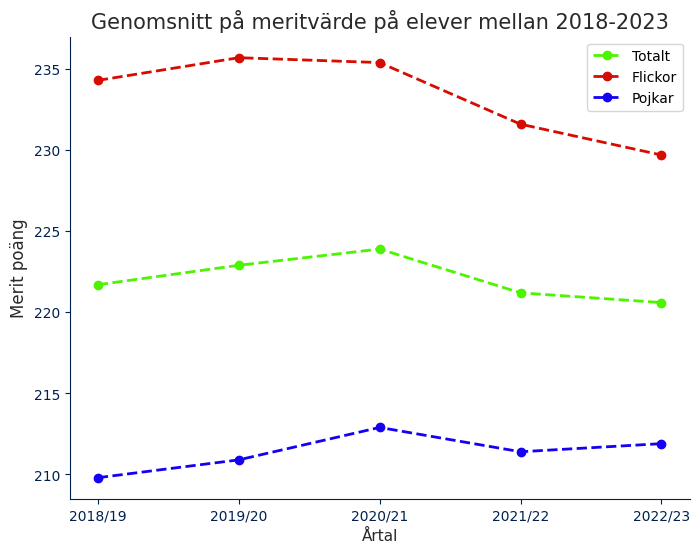

In [1243]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title(
    "Genomsnitt på meritvärde på elever mellan 2018-2023",
    color=colors["GRAY1"],
    fontsize=15,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(colors["BLUE2"])
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.tick_params(colors=colors["BLUE2"])
ax.set_xlabel("Årtal", color=colors["GRAY1"], fontsize=11)
ax.set_ylabel("Merit poäng", color=colors["GRAY1"], fontsize=12)

ax.plot(
    years,
    mean_merit16,
    label="Totalt",
    color=colors["GREEN1"],
    marker="o",
    linestyle="dashed",
    linewidth=2,
)
ax.plot(
    years,
    girls_merit16,
    label="Flickor",
    color=colors["RED1"],
    marker="o",
    linestyle="dashed",
    linewidth=2,
)
ax.plot(
    years,
    boys_merit16,
    label="Pojkar",
    color=colors["BLUE1"],
    marker="o",
    linestyle="dashed",
    linewidth=2,
)
ax.legend(loc="upper right")

## C)

In [1244]:
df_1a

Kategori                                                         Antal  \
Indelning                                                       Totalt   
0                                                    2018/19  112731.0   
1                                                    2019/20  115023.0   
2                                                    2020/21  116359.0   
3                                                    2021/22  120525.0   
4                                                    2022/23  121369.0   
5                                                     Kommun   96204.0   
6                                     Internationella skolor     213.0   
7                                                    Enskild   25165.0   
8                                          Allmän inriktning   23085.0   
9                                              Konfessionell    1036.0   
10                                                   Waldorf     630.0   
11                                    Internationella skolor     414.0   
12                                Elever med svensk bakgrund   88383.0   
13                              Elever med utländsk bakgrund   31918.0   
14                                           Födda i Sverige   13927.0   
15                           Födda utomlands, inv. före 2014    6431.0   
16                     Födda utomlands, inv. 2014 el. senare   11560.0   
17         Totalt exkl. nyinvandrade elever och okänd bak...  117503.0   
18                                       Nyinvandrade elever    2799.0   
19                                 Elever med okänd bakgrund    1067.0   
20                           Föräldrarnas högsta utbildning2       NaN   
21                                   Förgymnasial utbildning    6578.0   
22                                      Gymnasial utbildning   36842.0   
23                                 Eftergymnasial utbildning   74793.0   
24                                           Kort utbildning   18682.0   
25                                           Lång utbildning   56111.0   

Kategori                      (A-F)                  (A-E)                 
Indelning  Flickor   Pojkar  Totalt Flickor Pojkar  Totalt Flickor Pojkar  
0          54667.0  58064.0  112280   54430  57850  110663   53757  56906  
1          55670.0  59353.0  114444   55389  59055  112728   54711  58017  
2          56715.0  59644.0  115710   56394  59316  114136   55721  58415  
3          58513.0  62012.0  119891   58207  61684  117935   57312  60623  
4          59043.0  62326.0  120742   58703  62039  118736   57781  60955  
5          46478.0  49726.0   95991   46363  49628   94276   45588  48688  
6            115.0     98.0       .       .      .       .       .      .  
7          12565.0  12600.0   24751   12340  12411   24460   12193  12267  
8          11511.0  11574.0   23085   11511  11574   22815   11372  11443  
9            532.0    504.0    1036     532    504    1025     526    499  
10           297.0    333.0     630     297    333     620     295    325  
11           225.0    189.0       .       .      .       .       .      .  
12         43044.0  45339.0   88214   42961  45253   86799   42274  44525  
13         15488.0  16430.0   31488   15247  16241   30999   15066  15933  
14          6831.0   7096.0   13876    6807   7069   13709    6735   6974  
15          3078.0   3353.0    6340    3025   3315    6269    2993   3276  
16          5579.0   5981.0   11272    5415   5857   11021    5338   5683  
17         57195.0  60308.0  117044   56952  60092  115254   56114  59140  
18          1338.0   1461.0    2658    1256   1402    2544    1226   1318  
19           510.0    557.0    1040     495    545     938     441    497  
20             NaN      NaN     NaN     NaN    NaN     NaN     NaN    NaN  
21          3197.0   3381.0    6575    3197   3378    6327    3091   3236  
22         17909.0  18933.0   36810   17893  18917   35938   17488  18450  
23         36473.0  38320.0

In [1245]:
df_1b

Kategori                                                      \
Indelning                                                      
0                                                    2018/19   
1                                                    2019/20   
2                                                    2020/21   
3                                                    2021/22   
4                                                    2022/23   
5                                                     Kommun   
6                                                    Enskild   
7                                          Allmän inriktning   
8                                              Konfessionell   
9                                                    Waldorf   
10                                Elever med svensk bakgrund   
11                              Elever med utländsk bakgrund   
12                                           Födda i Sverige   
13                           Födda utomlands, inv. före 2014   
14                     Födda utomlands, inv. 2014 el. senare   
15         Totalt exkl. nyinvandrade elever och okänd bak...   
16                                       Nyinvandrade elever   
17                                 Elever med okänd bakgrund   
18                           Föräldrarnas högsta utbildning2   
19                                   Förgymnasial utbildning   
20                                      Gymnasial utbildning   
21                                 Eftergymnasial utbildning   
22                                           Kort utbildning   
23                                           Lång utbildning   

Kategori  Meritvärde 16 ämnen                Meritvärde 17 ämnen          \
Indelning              Totalt Flickor Pojkar              Totalt Flickor   
0                       221.7   234.3  209.8               229.8   243.3   
1                       222.9   235.7  210.9               231.1   244.9   
2                       223.9   235.4  212.9               232.1   244.4   
3                       221.2   231.6  211.4               229.2   240.3   
4                       220.6   229.7  211.9               228.5   238.2   
5                       216.1   225.6  207.2               223.6   233.8   
6                       237.9   245.0  230.8               247.2   254.8   
7                       238.5   245.8  231.2               247.9   255.7   
8                       225.6   230.5  220.5               233.2   238.4   
9                       236.3   239.0  233.9               244.3   247.1   
10                      227.4   236.3  219.1               236.0   245.4   
11                      204.0   214.1  194.5               210.2   221.0   
12                      215.5   224.7  206.6               223.0   232.8   
13                      217.4   227.6  208.0               224.8   235.8   
14                      182.1   193.1  171.8               186.1   197.7   
15                      223.0   232.1  214.3               231.1   240.9   
16                      144.8   152.0  138.2               146.2   153.6   
17                      133.3   133.9  132.8               135.2   135.8   
18                        NaN     NaN    NaN                 NaN     NaN   
19                      163.8   172.2  155.8               166.8   175.6   
20                      197.4   207.2  188.2               203.2   213.6   
21                      239.1   247.9  230.7               248.6   258.1   
22                      218.9   228.4  209.7               226.5   236.6   
23                      245.8   254.5  237.6               256.0   265.3   

Kategori         % elever med som saknar godkänt i ett eller flera ämnen  \
Indelning Pojkar                                                  Totalt   
0          217.0                                               24.5        
1          218.2                                               23.9        
2          220.3                                      

In [1246]:
categorie_c= [x for x in df_1b.loc[10: 17, ("", "")]]               #Skillnad på for loop innan och efter? när ska man använda vad?

born_sweden_merit16= [x for x in df_1b.loc[10: 17, (categories[3], "Totalt")]]


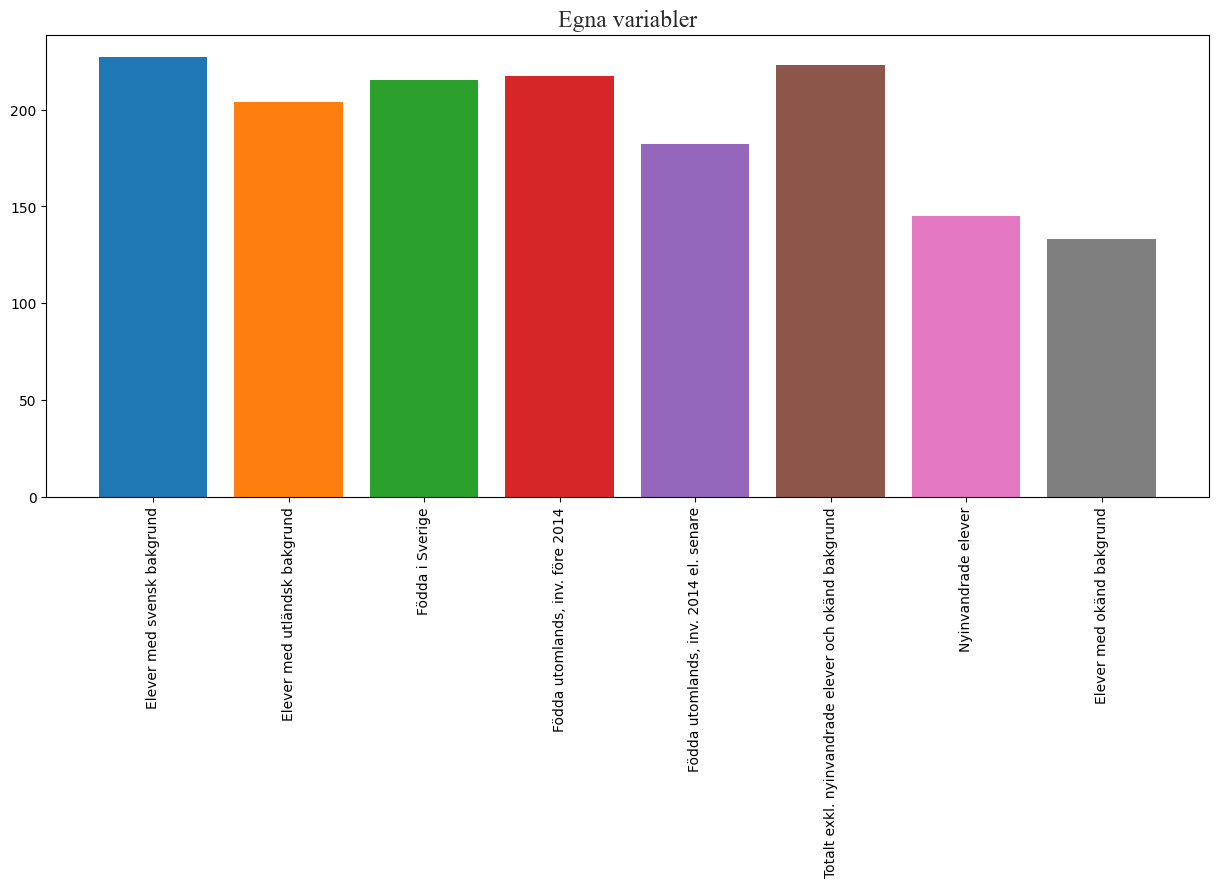

In [1247]:
fig, ax= plt.subplots(figsize= (15, 6))

ax.set_title("Egna variabler", color= colors["GRAY1"], fontdict= {"fontname": "Times New Roman", "fontsize": 17})
ax.tick_params(axis= "x", rotation= 90)

for categori, merit16 in zip(categorie_c, born_sweden_merit16):
    ax.bar(categori, merit16)